# Data Pipeline
https://keras.io/api/datasets/

In [1]:
from google.colab import drive
drive.mount('gdrive')

Mounted at gdrive


In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Input, Flatten, Conv1D, AveragePooling1D, concatenate, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model, Sequential
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
from keras.datasets import imdb

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=1000, maxlen=100)

17473536/17464789 [==============================] - 1s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the nda

In [4]:
from keras.datasets import cifar100

(X_train, y_train), (X_test, y_test) = cifar100.load_data(label_mode='fine')

169017344/169001437 [==============================] - 6s 0us/step


In [5]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


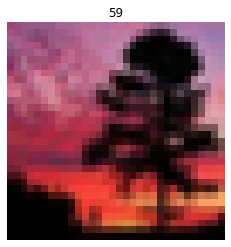

In [6]:
plt.imshow(X_train[21])
plt.gca().set_axis_off()
_ = plt.title(str(y_train[21][0]))

In [7]:
(X_train, y_train), (X_test, y_test) = imdb.load_data()

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the nda

In [8]:
print(X_train[21]) # list of words in sequential order
print(y_train[21]) # negative sentiment

[1, 466, 49, 2036, 204, 2442, 40, 4, 6724, 732, 15, 1754, 4, 978, 18, 4, 6412, 8262, 1890, 11866, 23067, 5, 41, 4246, 14, 22, 734, 346, 5, 1116, 8707, 6950, 22615, 85500, 186, 1020, 21, 9, 1053, 17, 8693, 6, 109, 37, 34, 1696, 22, 9, 3747, 8, 164, 53, 74, 4488, 33, 6, 10458, 149, 761, 11866, 20006, 35, 8793, 75615, 79629, 304, 125, 3355, 54, 761, 11866, 21609, 19154, 739, 4, 370, 13142, 23, 41, 2752, 3046, 6020, 60, 231, 41, 977, 8, 30, 37316, 42, 12158, 2504, 68665, 83, 139, 8, 21650, 35362, 6724, 7700, 7, 41, 10, 10, 6, 5327, 7421, 7, 11866, 23067, 62, 28, 77, 2640, 21, 14, 22, 472, 166, 6, 16835, 7, 199, 761, 30909, 113, 5, 15, 7, 6, 682, 251, 1222, 1656, 5, 41, 14001, 1309, 49029, 1432]
0


In [9]:
sequence_lengths = [len(sequence) for sequence in X_train]

In [10]:
print(np.max(sequence_lengths))
print(np.min(sequence_lengths))

2494
11


In [11]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(skip_top=50, oov_char=2)
sequence_lengths = [len(sequence) for sequence in X_train]

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the nda

In [12]:
# values are the same since skipped words are replaced with oov_char (out-of-vocab character)
print(np.max(sequence_lengths))
print(np.min(sequence_lengths))

2494
11


In [13]:
def remove_oov_char(element):
  return [word for word in element if word != 2]

def filter_list(lst):
  return[remove_oov_char(element) for element in lst]

In [14]:
X_train = filter_list(X_train)
sequence_lengths = [len(sequence) for sequence in X_train]
print(np.max(sequence_lengths))
print(np.min(sequence_lengths))

1648
3


# Dataset Generators
- function that uses 'yield' instead of 'return' to get data one at a time
- useful for enormous datasets that cant fit into memory
- can iterate over generator function using next(function)

In [15]:
def get_data(batch_size): # infite generator
  while True:
    y_train = np.random.choice([0,1], (batch_size, 1))
    X_train = np.random.randn(batch_size, 1) + (2*y_train -1)
    yield X_train, y_train

In [16]:
data_gen = get_data(3) # creates generator object that gets new data when calling next()

In [17]:
next(data_gen)

(array([[-0.52326554],
        [-1.815135  ],
        [-2.30239087]]), array([[0],
        [0],
        [0]]))

In [18]:
next(data_gen)

(array([[-0.12379226],
        [-1.28758887],
        [-0.84106371]]), array([[0],
        [0],
        [0]]))

In [19]:
next(data_gen)

(array([[ 1.47699646],
        [ 0.61006696],
        [-2.34327547]]), array([[1],
        [1],
        [0]]))

In [20]:
model = Sequential([Dense(1, activation='sigmoid')]) # basic logistic regression
model.compile(optimizer='sgd', loss='binary_crossentropy')

- fit method can handle data generators (used to need fit_generator but not anymore)
  - the same is true for evaluate and predict
- the model doesn't explicitly know how many sample there are (in this case, its infinite) so you need to specify the number of times to call the generator per epoch (steps_per_epoch)




In [21]:
model.fit(data_gen, steps_per_epoch=1000, epochs=10, verbose=1)

Epoch 1/10
1000/1000 [==============================] - 2s 1ms/step - loss: 0.5419
Epoch 2/10
1000/1000 [==============================] - 1s 1ms/step - loss: 0.3668
Epoch 3/10
1000/1000 [==============================] - 1s 1ms/step - loss: 0.3616
Epoch 4/10
1000/1000 [==============================] - 1s 1ms/step - loss: 0.3568
Epoch 5/10
1000/1000 [==============================] - 1s 1ms/step - loss: 0.3468
Epoch 6/10
1000/1000 [==============================] - 1s 1ms/step - loss: 0.3425
Epoch 7/10
1000/1000 [==============================] - 1s 1ms/step - loss: 0.3536
Epoch 8/10
1000/1000 [==============================] - 1s 1ms/step - loss: 0.3572
Epoch 9/10
1000/1000 [==============================] - 1s 1ms/step - loss: 0.3585
Epoch 10/10
1000/1000 [==============================] - 1s 1ms/step - loss: 0.3493


In [22]:
headers = ['Season', 'Age', 'Diseases', 'Trauma', 'Surgery', 'Fever', 'Alcohol', 'Smoking', 'Sitting', 'Output']
fertility = pd.read_csv('gdrive/MyDrive/Colab Notebooks/Datasets/fertility_Diagnosis.txt', header=None, names=headers)

In [23]:
fertility.head()

,Season,Age,Diseases,Trauma,Surgery,Fever,Alcohol,Smoking,Sitting,Output
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,N
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,O
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,N
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,N
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,O


In [24]:
fertility['Output'] = fertility['Output'].map(lambda x: 0 if x=='N' else 1)

In [25]:
fertility.head()

,Season,Age,Diseases,Trauma,Surgery,Fever,Alcohol,Smoking,Sitting,Output
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,0
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,1
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,0
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,0
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,1


In [26]:
fertility = fertility.astype('float32')

In [27]:
# shuffle data
# take random sample of data (frac=1 to return entire dataset)
fertility = fertility.sample(frac=1).reset_index(drop=True)

In [28]:
# one-hot encoding of season feature
fertility = pd.get_dummies(fertility, prefix='Season', columns=['Season'])

In [29]:
fertility.head()

,Age,Diseases,Trauma,Surgery,Fever,Alcohol,Smoking,Sitting,Output,Season_-1.0,Season_-0.33000001311302185,Season_0.33000001311302185,Season_1.0
0,0.53,1.0,0.0,0.0,1.0,0.8,-1.0,0.31,0.0,1,0,0,0
1,0.56,0.0,0.0,0.0,1.0,0.8,0.0,1.00,0.0,0,0,0,1
2,0.58,1.0,0.0,0.0,0.0,0.6,1.0,0.50,0.0,0,0,0,1
3,0.53,1.0,0.0,0.0,1.0,1.0,0.0,0.44,0.0,1,0,0,0
4,0.64,1.0,0.0,1.0,0.0,1.0,-1.0,0.38,0.0,0,0,0,1


In [30]:
# make the output the last column
fertility.columns = [col for col in fertility.columns if col != 'Output'] + ['Output']
fertility.head()

,Age,Diseases,Trauma,Surgery,Fever,Alcohol,Smoking,Sitting,Season_-1.0,Season_-0.33000001311302185,Season_0.33000001311302185,Season_1.0,Output
0,0.53,1.0,0.0,0.0,1.0,0.8,-1.0,0.31,0.0,1,0,0,0
1,0.56,0.0,0.0,0.0,1.0,0.8,0.0,1.00,0.0,0,0,0,1
2,0.58,1.0,0.0,0.0,0.0,0.6,1.0,0.50,0.0,0,0,0,1
3,0.53,1.0,0.0,0.0,1.0,1.0,0.0,0.44,0.0,1,0,0,0
4,0.64,1.0,0.0,1.0,0.0,1.0,-1.0,0.38,0.0,0,0,0,1


In [31]:
fertility = fertility.to_numpy()

In [32]:
train = fertility[:70]
valid = fertility[70:]
print(train.shape, valid.shape)

(70, 13) (30, 13)


In [33]:
X_train = train[:,:-1]
y_train = train[:,-1]
X_valid = valid[:,:-1]
y_valid = valid[:,-1]
print(X_train.shape, y_train.shape, X_valid.shape, y_valid.shape)

(70, 12) (70,) (30, 12) (30,)


In [34]:
# create generator
def get_generator(X, y, batch_size=1):
  for n in range(int(len(X)/batch_size)):
    yield (X[n*batch_size:(n+1)*batch_size], y[n*batch_size:(n+1)*batch_size])

In [35]:
train_generator = get_generator(X_train, y_train, batch_size=10)

In [36]:
next(train_generator) # can do this 7 times since there are 70 samples with batch size 10 (on 8th try, you will get an error)

(array([[ 0.53,  1.  ,  0.  ,  0.  ,  1.  ,  0.8 , -1.  ,  0.31,  0.  ,
          1.  ,  0.  ,  0.  ],
        [ 0.56,  0.  ,  0.  ,  0.  ,  1.  ,  0.8 ,  0.  ,  1.  ,  0.  ,
          0.  ,  0.  ,  0.  ],
        [ 0.58,  1.  ,  0.  ,  0.  ,  0.  ,  0.6 ,  1.  ,  0.5 ,  0.  ,
          0.  ,  0.  ,  0.  ],
        [ 0.53,  1.  ,  0.  ,  0.  ,  1.  ,  1.  ,  0.  ,  0.44,  0.  ,
          1.  ,  0.  ,  0.  ],
        [ 0.64,  1.  ,  0.  ,  1.  ,  0.  ,  1.  , -1.  ,  0.38,  0.  ,
          0.  ,  0.  ,  0.  ],
        [ 0.69,  0.  ,  1.  ,  1.  ,  0.  ,  0.8 ,  0.  ,  0.88,  0.  ,
          0.  ,  1.  ,  0.  ],
        [ 0.67,  1.  ,  1.  ,  0.  ,  0.  ,  0.8 , -1.  ,  0.25,  0.  ,
          0.  ,  0.  ,  0.  ],
        [ 0.53,  1.  ,  1.  ,  0.  ,  1.  ,  0.8 , -1.  ,  0.38,  0.  ,
          1.  ,  0.  ,  0.  ],
        [ 0.92,  1.  ,  1.  ,  0.  ,  1.  ,  1.  , -1.  ,  0.63,  0.  ,
          0.  ,  1.  ,  0.  ],
        [ 0.72,  1.  ,  1.  ,  0.  ,  0.  ,  0.6 ,  1.  ,  0.19,  0.  ,
 

In [37]:
input_shape = (12,)
output_shape = (1,)

model_input = Input(input_shape)
batch_1 = BatchNormalization(momentum=0.8)(model_input)
dense_1 = Dense(100, activation='relu')(batch_1)
batch_2 = BatchNormalization(momentum=0.8)(dense_1)
output = Dense(1, activation='sigmoid')(batch_2)

model = Model(inputs=model_input, outputs=output)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 12)]              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 12)                48        
_________________________________________________________________
dense_1 (Dense)              (None, 100)               1300      
_________________________________________________________________
batch_normalization_1 (Batch (None, 100)               400       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 1,849
Trainable params: 1,625
Non-trainable params: 224
_________________________________________________________________


In [38]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-2), loss='binary_crossentropy', metrics=['accuracy'])

In [39]:
batch_size = 5
train_steps = len(X_train) // batch_size
epochs = 3
for epoch in range(epochs):
  train_generator = get_generator(X_train, y_train, batch_size=batch_size)
  validation_generator = get_generator(X_valid, y_valid, batch_size=len(X_valid))
  model.fit(train_generator, steps_per_epoch=train_steps, validation_data=validation_generator, validation_steps=1)

# note that running this again will cause an error since the generator will run out of data
# can fix this by making the generator function infinite

14/14 [==============================] - 0s 6ms/step - loss: 0.0537 - accuracy: 1.0000 - val_loss: 0.0165 - val_accuracy: 1.0000


In [40]:
# this generator never runs out of data
def get_generator_cyclic(X, y, batch_size=1):
  while True:
    for n in range(int(len(X)/batch_size)):
      yield (X[n*batch_size:(n+1)*batch_size], y[n*batch_size:(n+1)*batch_size])
    # re-shuffle data after each 'epoch'
    permuted = np.random.permutation(len(X))
    X = X[permuted]
    y = y[permuted]

In [41]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator # generator object that allows preprocessing or augmentation
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
image_data_gen = ImageDataGenerator(rescale=1/255, horizontal_flip=True, height_shift_range=0.2, fill_mode='nearest', featurewise_center=True)
# horizontal_flip randomly decides whether or not to flip image (effectively doubling the size of the dataset)
# height_shift_range randomly shifts image up or down at most 20% of the image (in this case)
# fill_mode controls how the pixels are replaced after shifting
# featurewise_center standardizes the mean of each feature across the entire dataset to zero (the features of an image are the three RGB channels)
  # need to use fit method on the image generator for it to calculate how to feature means before using it for training
image_data_gen.fit(X_train)
# use flow method to get the generator object used for training
train_datagen = image_data_gen.flow(X_train, y_train, batch_size=16)
#model.fit(train_datagen, epochs=20)

170500096/170498071 [==============================] - 6s 0us/step


In [42]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

num_classes=10
y_train = keras.utils.to_categorical(y_train, num_classes) # convert to one-hot encoding
y_test = keras.utils.to_categorical(y_test, num_classes)

In [43]:
def get_generator(X, y, batch_size=1):
  for n in range(int(len(X)/batch_size)):
    yield (X[n*batch_size:(n+1)*batch_size], y[n*batch_size:(n+1)*batch_size])

In [44]:
training_generator = get_generator(X_train, y_train)

(1, 32, 32, 3)
(1, 10)
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


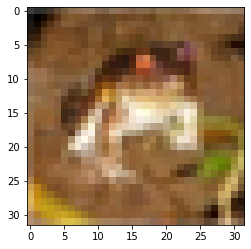

In [45]:
image, label = next(training_generator)
print(image.shape)
print(label.shape)
plt.imshow(image[0,:,:,:])
print(label)

In [46]:
training_generator = get_generator(X_train, y_train)

In [47]:
# define preprocessing function that converts color image to grayscale (can pass this into ImageDataGenerator)

def monochrome(x):
  def func_bw(a):
    average_color = np.mean(a)
    return [average_color, average_color, average_color]
  x = np.apply_along_axis(func_bw, axis=-1, arr=x)
  return x

In [48]:
image_generator = ImageDataGenerator(preprocessing_function=monochrome,
                                     rotation_range=180,
                                     rescale=1/255.)
image_generator.fit(X_train) # probably good to do this every time even though it doesn't seem necessary in this case

In [49]:
image_generator_iterable = image_generator.flow(X_train, y_train, batch_size=1, shuffle=False)

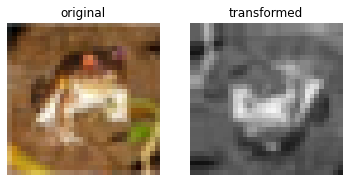

In [50]:
image_orig, label_orig = next(training_generator)
image, label = next(image_generator_iterable)
fig, axs = plt.subplots(1,2)
axs[0].imshow(image_orig[0,:,:,:])
axs[0].set_axis_off()
axs[0].set_title('original')
axs[1].imshow(image[0,:,:,:])
axs[1].set_axis_off()
_ = axs[1].set_title('transformed')

### Flow from directory
- you can get data from a directory using the flow_from_directory method on your ImageDataGenerator object using the filepath as the first argument

# Time Series generator

In [51]:
from IPython import display
display.display(display.Audio('gdrive/MyDrive/Colab Notebooks/Datasets/mixture.wav'))

Output hidden; open in https://colab.research.google.com to view.

In [52]:
dummy_data = np.arange(1, 11, 1)
dummy_targets = np.arange(10, 110, 10)

In [53]:
from keras.preprocessing.sequence import TimeseriesGenerator
timeseries_gen = TimeseriesGenerator(dummy_data, dummy_targets, length=4)

In [54]:
print('Length: ', len(timeseries_gen))
inputs, outputs = timeseries_gen[0]
print('data:')
print(inputs)
print('targets:')
print(outputs)

Length:  1
data:
[[1 2 3 4]
 [2 3 4 5]
 [3 4 5 6]
 [4 5 6 7]
 [5 6 7 8]
 [6 7 8 9]]
targets:
[ 50  60  70  80  90 100]


In [55]:
timeseries_gen = TimeseriesGenerator(dummy_data, dummy_targets, length=3, batch_size=2)

In [56]:
# ImageDataGenerator used flow method to be iterable
# TimeSeriesGenerator uses iter()
timeseries_iterator = iter(timeseries_gen)

In [57]:
next(timeseries_iterator)

(array([[1, 2, 3],
        [2, 3, 4]]), array([40, 50]))

In [58]:
timeseries_gen = TimeseriesGenerator(dummy_data, dummy_targets, length=3, stride=2, batch_size=2)
timeseries_iterator = iter(timeseries_gen)

In [59]:
while True:
  try:
    print(next(timeseries_iterator))
  except StopIteration:
    break

(array([[1, 2, 3],
       [3, 4, 5]]), array([40, 60]))
(array([[5, 6, 7],
       [7, 8, 9]]), array([ 80, 100]))


In [60]:
timeseries_gen = TimeseriesGenerator(dummy_data, dummy_targets, length=3, stride=2, batch_size=2, reverse=True)
timeseries_iterator = iter(timeseries_gen)
while True:
  try:
    print(next(timeseries_iterator))
  except StopIteration:
    break

(array([[3, 2, 1],
       [5, 4, 3]]), array([40, 60]))
(array([[7, 6, 5],
       [9, 8, 7]]), array([ 80, 100]))


In [61]:
from scipy.io.wavfile import read, write # these function help load audio tracks as arrays that can be passed to TimeseriesGenerator

rate, song = read('gdrive/MyDrive/Colab Notebooks/Datasets/mixture.wav')
print('rate: ', rate)
song = np.array(song)
print('song shape: ', song.shape)

rate:  44100
song shape:  (1942186, 2)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: WavFileWarning: Chunk (non-data) not understood, skipping it.
  This is separate from the ipykernel package so we can avoid doing imports until


In [62]:
# setting the target=song means that we use the song to predict the next value in the song
# setting length and stride to same value means samples will not overlap
timeseries_gen = TimeseriesGenerator(song, targets=song, length=200000, stride=200000, batch_size=1)
timeseries_iterator = iter(timeseries_gen)

In [63]:
for i in range(3):
  sample, target = next(timeseries_iterator)
  write('example.wav', rate, sample[0])
  print('Sample ', i+1)
  display.display(display.Audio('example.wav'))

Output hidden; open in https://colab.research.google.com to view.

In [64]:
# sampling_rate=2 will cause every other value to be selected
# note that length argument refers to length before sampling_rate is applied
timeseries_gen = TimeseriesGenerator(song, targets=song, length=200000, stride=200000, batch_size=1, sampling_rate=2)
timeseries_iterator = iter(timeseries_gen)
for i in range(3):
  sample, target = next(timeseries_iterator)
  write('example.wav', rate, sample[0])
  print('Sample ', i+1)
  display.display(display.Audio('example.wav'))

Sample  1


Sample  2


Sample  3


In [65]:
timeseries_gen = TimeseriesGenerator(song, targets=song, length=200000, stride=200000, batch_size=1, reverse=True)
timeseries_iterator = iter(timeseries_gen)
for i in range(3):
  sample, target = next(timeseries_iterator)
  write('example.wav', rate, sample[0])
  print('Sample ', i+1)
  display.display(display.Audio('example.wav'))

Output hidden; open in https://colab.research.google.com to view.

# tf.data module

In [66]:
example_dataset = tf.data.Dataset.from_tensor_slices(np.arange(20).reshape(10,2))
print(example_dataset)

<TensorSliceDataset shapes: (2,), types: tf.int64>


In [67]:
for element in example_dataset:
  print(element)
  print(element.numpy())

tf.Tensor([0 1], shape=(2,), dtype=int64)
[0 1]
tf.Tensor([2 3], shape=(2,), dtype=int64)
[2 3]
tf.Tensor([4 5], shape=(2,), dtype=int64)
[4 5]
tf.Tensor([6 7], shape=(2,), dtype=int64)
[6 7]
tf.Tensor([8 9], shape=(2,), dtype=int64)
[8 9]
tf.Tensor([10 11], shape=(2,), dtype=int64)
[10 11]
tf.Tensor([12 13], shape=(2,), dtype=int64)
[12 13]
tf.Tensor([14 15], shape=(2,), dtype=int64)
[14 15]
tf.Tensor([16 17], shape=(2,), dtype=int64)
[16 17]
tf.Tensor([18 19], shape=(2,), dtype=int64)
[18 19]


In [68]:
# dataset size will always be the first dimension (128 in the example below, each element with length 5)
example_dataset = tf.data.Dataset.from_tensor_slices(tf.random.uniform([128, 5]))

# inspect the specification of each element
print(example_dataset.element_spec)

TensorSpec(shape=(5,), dtype=tf.float32, name=None)


In [69]:
# pass in tuple (e.g. X and y data) - make sure first dimensions have the same size
example_dataset = tf.data.Dataset.from_tensor_slices(
    (tf.random.uniform([256,4], minval=1, maxval=10, dtype=tf.int32),
     tf.random.normal([256]))
)
print(example_dataset.element_spec)

(TensorSpec(shape=(4,), dtype=tf.int32, name=None), TensorSpec(shape=(), dtype=tf.float32, name=None))


In [70]:
# take(n) method will only take first n elements in dataset to iterate over
for elements in example_dataset.take(2):
  for element in elements:
    print(element)

tf.Tensor([2 4 9 9], shape=(4,), dtype=int32)
tf.Tensor(0.8379566, shape=(), dtype=float32)
tf.Tensor([8 8 1 1], shape=(4,), dtype=int32)
tf.Tensor(0.87822145, shape=(), dtype=float32)


In [71]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
print(dataset.element_spec)

(TensorSpec(shape=(32, 32, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(1,), dtype=tf.uint8, name=None))


In [72]:
for element in dataset.take(1):
  print(element)

(<tf.Tensor: shape=(32, 32, 3), dtype=uint8, numpy=
array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140

In [73]:
img_datagen = ImageDataGenerator(width_shift_range=0.2, horizontal_flip=True)
# pass in callable generator (don't forget flow method)
# args = [] is a list of arguments that need to be passed to the generator
dataset = tf.data.Dataset.from_generator(img_datagen.flow, 
                                         args=[X_train, y_train], 
                                         output_types=(tf.float32, tf.int32), 
                                         output_shapes=([32,32,32,3],[32,1]))

In [74]:
x = np.zeros([100, 10, 2, 2])
dataset1 = tf.data.Dataset.from_tensor_slices(x)
print(dataset1.element_spec)

TensorSpec(shape=(10, 2, 2), dtype=tf.float64, name=None)


In [75]:
x2 = [np.zeros((10, 2, 2)), np.zeros((5, 2, 2))]
dataset2 = tf.data.Dataset.from_tensor_slices(x2) # error since elements have different shape in first dimension

ValueError: ignored

In [76]:
x2 = [np.zeros((10, 1)), np.zeros((10, 1)), np.zeros((10,1))]
dataset2 = tf.data.Dataset.from_tensor_slices(x2)
print(dataset2.element_spec)

TensorSpec(shape=(10, 1), dtype=tf.float64, name=None)


In [77]:
dataset_zipped = tf.data.Dataset.zip((dataset1, dataset2))
print(dataset_zipped.element_spec)
# zip function does NOT require the first dimensions of dataset1 (100) and dataset2 (3) to be same size
# however, it will trim the larger one so that there will only be 3 batches in this case to accomodate smaller datset

(TensorSpec(shape=(10, 2, 2), dtype=tf.float64, name=None), TensorSpec(shape=(10, 1), dtype=tf.float64, name=None))


In [78]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
print(type(X_train), type(y_train))

11493376/11490434 [==============================] - 0s 0us/step
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [79]:
mnist_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
print(mnist_dataset.element_spec)
# note that shape=() just means scalar

(TensorSpec(shape=(28, 28), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.uint8, name=None))


In [80]:
element = next(iter(mnist_dataset))

In [81]:
print(element[0].shape)
print(element[1].shape)

(28, 28)
()


# TextLineDataset
- this creates a dataset from a text file
- use iter(TextLineDataset) to be able to iterate over it
- if you have more than one text file, you can mix the lines of the files together with interleave function (check documentation)

# Training models with datasets

In [82]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
print(dataset.element_spec)

(TensorSpec(shape=(32, 32, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(1,), dtype=tf.uint8, name=None))


In [83]:
dataset = dataset.batch(16) # this will create a dataset with batch size 16 to feed into a model
print(dataset.element_spec) # now shape info has None in first dimension for batch size

(TensorSpec(shape=(None, 32, 32, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(None, 1), dtype=tf.uint8, name=None))


In [84]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
dataset = dataset.batch(16, drop_remainder=True) # drop_remainder will make sure the final batch doesn't have less than 16
print(dataset.element_spec) # this causes first dimension of shape to be 16 since it now MUST be 16

(TensorSpec(shape=(16, 32, 32, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(16, 1), dtype=tf.uint8, name=None))


In [85]:
dataset = dataset.repeat(10) # repeats the dataset 10 times so you can train a model for 10 epochs
#history = model.fit(dataset)

In [86]:
# alternatively, use repeat() with no argument so that ir repeats indefinitely
dataset = dataset.repeat()
# now you need to specify how many iterations is a full epoch (// will get same outcome as drop_remainder=True)
# history = model.fit(dataset, steps_per_epoch=X_train.shape[0]//16, epochs=10)

In [87]:
dataset = dataset.shuffle(100) # randomly shuffles elements with a buffer size of 100 samples that the batch size of 16 is drawn from

In [88]:
# use map function to apply custom function that performs preprocessing
def rescale(image, label): # function must include both image and label (since that is how we defined the data)
  return image/255, label

#dataset = dataset.map(rescale)

# use filter function to apply custom function that returns boolean to filter out certain data
def label_filter(image, label):
  return tf.squeeze(label) != 9

#dataset.filter(label_filter)

In [89]:
# Final Pipeline
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
dataset = dataset.map(rescale)
dataset.filter(label_filter)
dataset = dataset.shuffle(100)
dataset = dataset.batch(16, drop_remainder=True)
dataset = dataset.repeat()
# history = model.fit(dataset, steps_per_epoch=X_train.shape[0]//16, epochs=10)

In [152]:
bank_df = pd.read_csv('gdrive/MyDrive/Colab Notebooks/Datasets/bank-full.csv', delimiter=';')
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [153]:
bank_df.shape

(45211, 17)

In [154]:
features = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'campaign', 'pdays', 'poutcome']
labels = ['y']
bank_df = bank_df.filter(features + labels)

In [155]:
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,campaign,pdays,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,1,-1,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,1,-1,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,1,-1,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,1,-1,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,1,-1,unknown,no


In [156]:
from sklearn.preprocessing import LabelBinarizer # alternative to pd.get_dummies or keras.to_categorical
encoder = LabelBinarizer()
categorical_features = ['default', 'housing', 'job', 'loan', 'education', 'contact', 'poutcome']
bank_df = pd.get_dummies(bank_df, columns=categorical_features, drop_first=True)
bank_df.head()

,age,marital,balance,campaign,pdays,y,default_yes,housing_yes,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,loan_yes,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,58,married,2143,1,-1,no,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1
1,44,single,29,1,-1,no,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1
2,33,married,2,1,-1,no,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1
3,47,married,1506,1,-1,no,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1
4,33,single,1,1,-1,no,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1


In [157]:
bank_df = bank_df.sample(frac=1).reset_index(drop=True)

In [158]:
# convert df to dataset
bank_dataset = tf.data.Dataset.from_tensor_slices(dict(bank_df))
bank_dataset.element_spec

{'age': TensorSpec(shape=(), dtype=tf.int64, name=None),
 'balance': TensorSpec(shape=(), dtype=tf.int64, name=None),
 'campaign': TensorSpec(shape=(), dtype=tf.int64, name=None),
 'contact_telephone': TensorSpec(shape=(), dtype=tf.uint8, name=None),
 'contact_unknown': TensorSpec(shape=(), dtype=tf.uint8, name=None),
 'default_yes': TensorSpec(shape=(), dtype=tf.uint8, name=None),
 'education_secondary': TensorSpec(shape=(), dtype=tf.uint8, name=None),
 'education_tertiary': TensorSpec(shape=(), dtype=tf.uint8, name=None),
 'education_unknown': TensorSpec(shape=(), dtype=tf.uint8, name=None),
 'housing_yes': TensorSpec(shape=(), dtype=tf.uint8, name=None),
 'job_blue-collar': TensorSpec(shape=(), dtype=tf.uint8, name=None),
 'job_entrepreneur': TensorSpec(shape=(), dtype=tf.uint8, name=None),
 'job_housemaid': TensorSpec(shape=(), dtype=tf.uint8, name=None),
 'job_management': TensorSpec(shape=(), dtype=tf.uint8, name=None),
 'job_retired': TensorSpec(shape=(), dtype=tf.uint8, name=No

In [159]:
# let's only include divorced people in this datset
bank_dataset = bank_dataset.filter(lambda x: tf.equal(x['marital'], tf.constant('divorced')))

In [160]:
# make sure the filter function worked
bank_dataset_iterable = iter(bank_dataset)
for x in bank_dataset_iterable:
  if x['marital'] != 'divorced':
    print('something went wrong!')
    break

In [161]:
# map y label from string to integer
def map_label(x):
  x['y'] = 0 if (x['y'] == tf.constant(['no'], dtype=tf.string)) else 1
  return x

bank_dataset = bank_dataset.map(map_label)
bank_dataset.element_spec

{'age': TensorSpec(shape=(), dtype=tf.int64, name=None),
 'balance': TensorSpec(shape=(), dtype=tf.int64, name=None),
 'campaign': TensorSpec(shape=(), dtype=tf.int64, name=None),
 'contact_telephone': TensorSpec(shape=(), dtype=tf.uint8, name=None),
 'contact_unknown': TensorSpec(shape=(), dtype=tf.uint8, name=None),
 'default_yes': TensorSpec(shape=(), dtype=tf.uint8, name=None),
 'education_secondary': TensorSpec(shape=(), dtype=tf.uint8, name=None),
 'education_tertiary': TensorSpec(shape=(), dtype=tf.uint8, name=None),
 'education_unknown': TensorSpec(shape=(), dtype=tf.uint8, name=None),
 'housing_yes': TensorSpec(shape=(), dtype=tf.uint8, name=None),
 'job_blue-collar': TensorSpec(shape=(), dtype=tf.uint8, name=None),
 'job_entrepreneur': TensorSpec(shape=(), dtype=tf.uint8, name=None),
 'job_housemaid': TensorSpec(shape=(), dtype=tf.uint8, name=None),
 'job_management': TensorSpec(shape=(), dtype=tf.uint8, name=None),
 'job_retired': TensorSpec(shape=(), dtype=tf.uint8, name=No

In [162]:
# remove marital column

bank_dataset = bank_dataset.map(lambda x: {key:val for key,val in x.items() if key != 'marital'})
bank_dataset.element_spec

{'age': TensorSpec(shape=(), dtype=tf.int64, name=None),
 'balance': TensorSpec(shape=(), dtype=tf.int64, name=None),
 'campaign': TensorSpec(shape=(), dtype=tf.int64, name=None),
 'contact_telephone': TensorSpec(shape=(), dtype=tf.uint8, name=None),
 'contact_unknown': TensorSpec(shape=(), dtype=tf.uint8, name=None),
 'default_yes': TensorSpec(shape=(), dtype=tf.uint8, name=None),
 'education_secondary': TensorSpec(shape=(), dtype=tf.uint8, name=None),
 'education_tertiary': TensorSpec(shape=(), dtype=tf.uint8, name=None),
 'education_unknown': TensorSpec(shape=(), dtype=tf.uint8, name=None),
 'housing_yes': TensorSpec(shape=(), dtype=tf.uint8, name=None),
 'job_blue-collar': TensorSpec(shape=(), dtype=tf.uint8, name=None),
 'job_entrepreneur': TensorSpec(shape=(), dtype=tf.uint8, name=None),
 'job_housemaid': TensorSpec(shape=(), dtype=tf.uint8, name=None),
 'job_management': TensorSpec(shape=(), dtype=tf.uint8, name=None),
 'job_retired': TensorSpec(shape=(), dtype=tf.uint8, name=No

In [163]:
# combine the features into a list and concatenate into tuple with y
def map_feature_label(x):
  features = [tf.cast(val, tf.int64) for key,val in x.items() if key != 'y']
  return (tf.stack(features), x['y'])
bank_dataset = bank_dataset.map(map_feature_label)
bank_dataset.element_spec

(TensorSpec(shape=(26,), dtype=tf.int64, name=None),
 TensorSpec(shape=(), dtype=tf.int32, name=None))

In [164]:
# determine length of dataset - no easy way to do it - must iterate over whole dataset
length = 0
for _ in bank_dataset:
  length += 1
print(length)

5207


In [165]:
# make training and validation datasets
train_elements = int(length * 0.7)
train_dataset = bank_dataset.take(train_elements)
test_dataset = bank_dataset.skip(train_elements) # skip is opposite of take

In [167]:
# build classifier
model = Sequential([
                    BatchNormalization(momentum=0.8, input_shape=(26,)),
                    Dense(400, activation='relu'),
                    BatchNormalization(momentum=0.8),
                    Dense(400, activation='relu'),
                    BatchNormalization(momentum=0.8),
                    Dense(1, activation='sigmoid'),
])
model.compile(optimizer=keras.optimizers.Adam(1e-4), loss='binary_crossentropy', metrics='accuracy')
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_5 (Batch (None, 26)                104       
_________________________________________________________________
dense_6 (Dense)              (None, 400)               10800     
_________________________________________________________________
batch_normalization_6 (Batch (None, 400)               1600      
_________________________________________________________________
dense_7 (Dense)              (None, 400)               160400    
_________________________________________________________________
batch_normalization_7 (Batch (None, 400)               1600      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 401       
Total params: 174,905
Trainable params: 173,253
Non-trainable params: 1,652
____________________________________________

In [168]:
train_dataset = train_dataset.batch(20, drop_remainder=True)
test_dataset = test_dataset.batch(100)

train_dataset = train_dataset.shuffle(1000)

history = model.fit(train_dataset, validation_data=test_dataset, epochs=5)

Epoch 1/5
182/182 [==============================] - 5s 17ms/step - loss: 0.6603 - accuracy: 0.6418 - val_loss: 0.5843 - val_accuracy: 0.7550
Epoch 2/5
182/182 [==============================] - 4s 16ms/step - loss: 0.4769 - accuracy: 0.8242 - val_loss: 0.4693 - val_accuracy: 0.8285
Epoch 3/5
182/182 [==============================] - 4s 16ms/step - loss: 0.3726 - accuracy: 0.8959 - val_loss: 0.4407 - val_accuracy: 0.8324
Epoch 4/5
182/182 [==============================] - 4s 16ms/step - loss: 0.3019 - accuracy: 0.9157 - val_loss: 0.3791 - val_accuracy: 0.8714
Epoch 5/5
182/182 [==============================] - 5s 17ms/step - loss: 0.2556 - accuracy: 0.9255 - val_loss: 0.3668 - val_accuracy: 0.8810


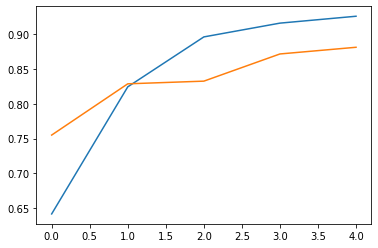

In [170]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [172]:
import tensorflow_datasets as tfds

In [173]:
tfds.list_builders()

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'amazon_us_reviews',
 'anli',
 'arc',
 'bair_robot_pushing_small',
 'bccd',
 'beans',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'blimp',
 'bool_q',
 'c4',
 'caltech101',
 'caltech_birds2010',
 'caltech_birds2011',
 'cars196',
 'cassava',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'cfq',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar10_1',
 'cifar10_corrupted',
 'citrus_leaves',
 'cityscapes',
 'civil_comments',
 'clevr',
 'clic',
 'clinc_oos',
 'cmaterdb',
 'cnn_dailymail',
 'coco',
 'coco_captions',
 'coil100',
 'colorectal_histology',
 'colorectal_histology_large',
 'common_voice',
 'coqa',
 'cos_e',
 'cosmos_qa',
 'covid19sum',
 'crema_d',
 'curated_breast_imaging_ddsm',
 'cycle_gan',
 'deep_weeds',
 'definite_pronoun_resolution',
 'dementiabank',
 'diabetic_retinopathy_detection',
 'div2k',
 'dmlab',
 'downsampled_imagenet',
 

In [174]:
kminst = tfds.load(name='kmnist', split=None) # use load function to load in one of the above datasets
kminst_train = kminst['train']
kminst_test = kminst['test']

Shuffling and writing examples to /root/tensorflow_datasets/kmnist/3.0.1.incomplete4SLVG9/kmnist-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/kmnist/3.0.1.incomplete4SLVG9/kmnist-test.tfrecord


Dataset kmnist downloaded and prepared to /root/tensorflow_datasets/kmnist/3.0.1. Subsequent calls will reuse this data.
